In [1]:
import numpy as np

def generate_random_walk_data(num_samples, num_timesteps, num_variables):
    # Generate random walk data
    random_walk_data = np.cumsum(np.random.randn(num_samples, num_timesteps, num_variables), axis=1)
    
    # Create a mask for observed/unobserved data (0 for unobserved, 1 for observed)
    mask = (np.random.rand(num_samples, num_timesteps, num_variables) > 0.4).astype(float)  # 70% data observed

    # Combine data and mask
    data_with_mask = np.concatenate((random_walk_data, mask), axis=2)
    
    # Generate a time progression array for each sample
    time_progression = np.linspace(0, 1, num_timesteps).reshape(1, num_timesteps, 1)
    time_progression = np.repeat(time_progression, num_samples, axis=0)
    
    # Add time progression as the last dimension
    final_data = np.concatenate((data_with_mask, time_progression), axis=2)

    return final_data

# Parameters for the simulated data
num_samples = 5 * int(10e3)  # Number of samples in the dataset
num_timesteps = 200  # Number of time points per sample
num_variables = 4  # Number of variables

# Generate the data
train_data = generate_random_walk_data(num_samples, num_timesteps, num_variables)
val_data = generate_random_walk_data(num_samples // 2, num_timesteps, num_variables)
test_data = generate_random_walk_data(num_samples // 2, num_timesteps, num_variables)

# Save the data in the .npz format
np.savez('simulated_random_walk_data.npz', train=train_data, val=val_data, test=test_data)

print("Simulated data generated and saved as 'simulated_random_walk_data.npz'")


Simulated data generated and saved as 'simulated_random_walk_data.npz'


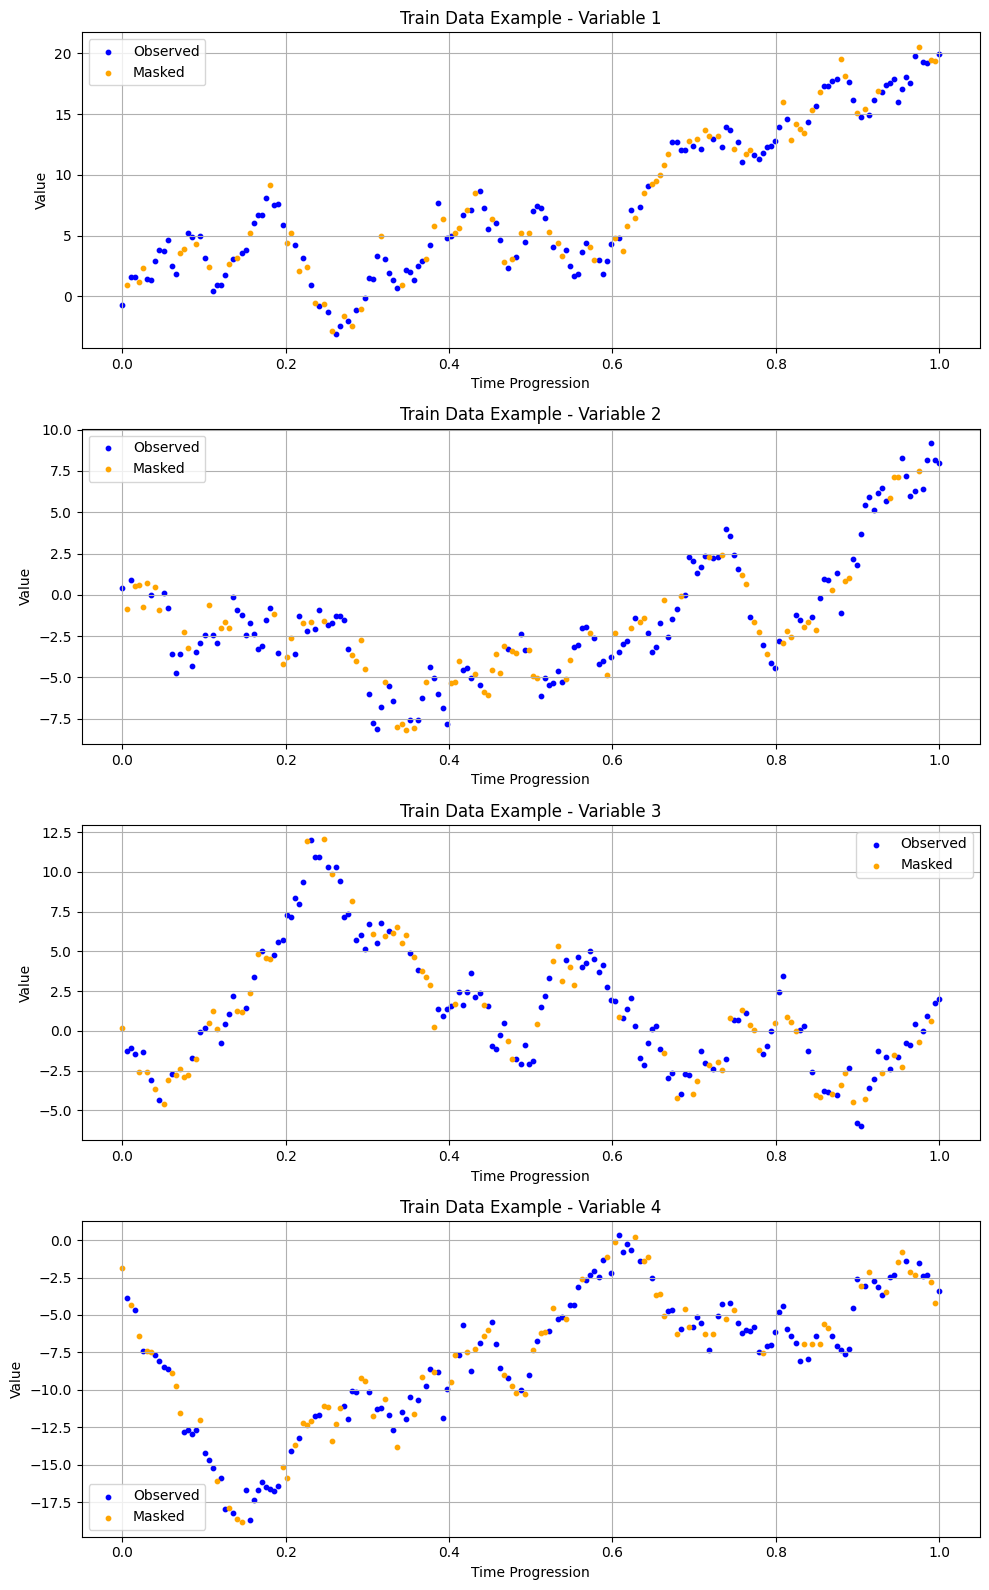

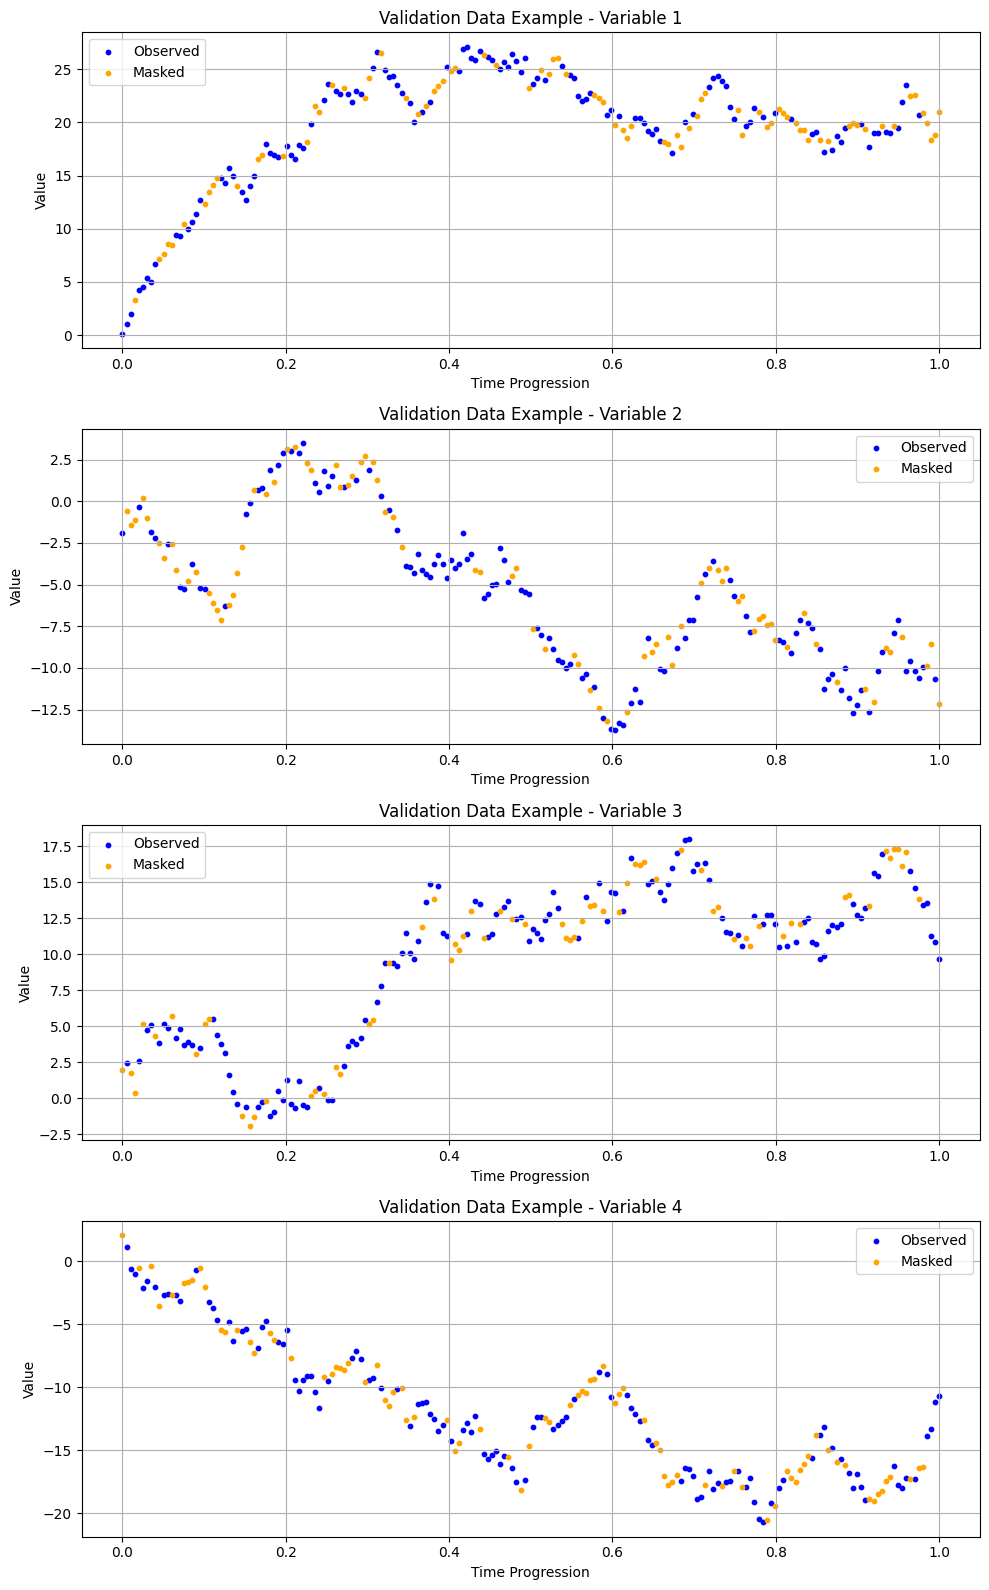

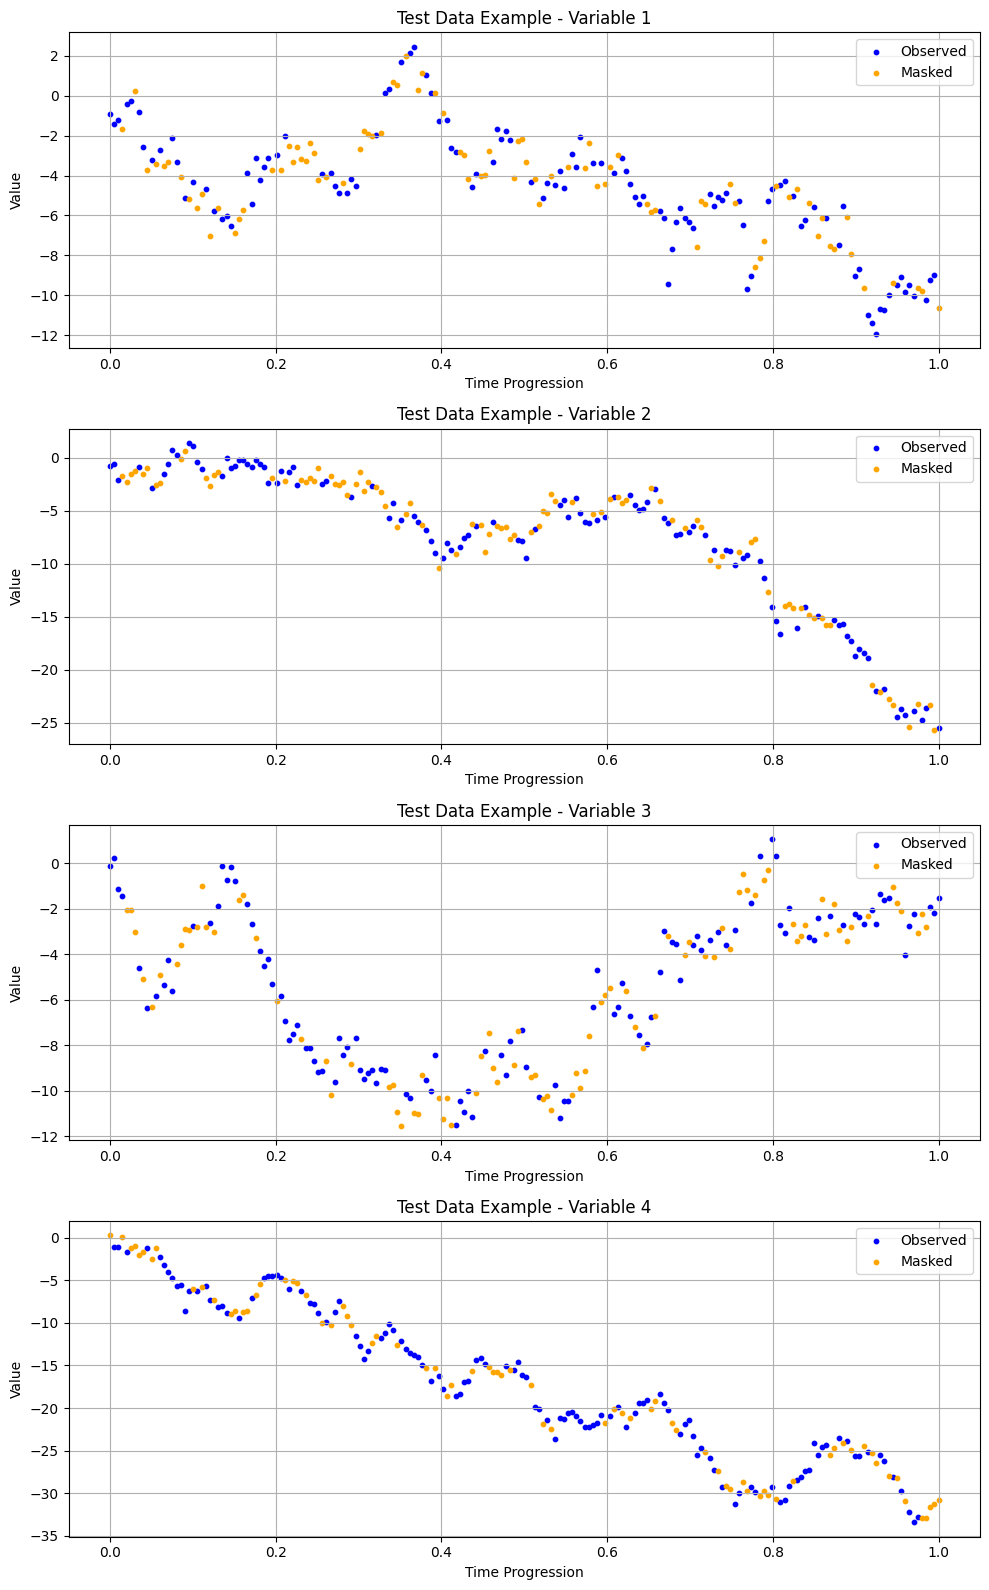

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load('simulated_random_walk_data.npz')
train_data = data['train']
val_data = data['val']
test_data = data['test']

# Function to plot a random example from the data
def plot_random_example(data, title):
    # Choose a random sample
    random_index = np.random.randint(data.shape[0])
    sample = data[random_index]
    
    # Extract the random walk values, mask, and time progression
    num_variables = (sample.shape[1] - 1) // 2
    random_walk = sample[:, :num_variables]
    mask = sample[:, num_variables:2*num_variables]
    time_progression = sample[:, -1]
    
    # Create subplots for each variable
    fig, axes = plt.subplots(num_variables, 1, figsize=(10, 4 * num_variables))
    
    for i in range(num_variables):
        ax = axes[i] if num_variables > 1 else axes
        # Separate observed and masked points
        observed_points = np.where(mask[:, i] == 1)[0]
        masked_points = np.where(mask[:, i] == 0)[0]
        
        # Plot observed and masked points
        ax.scatter(time_progression[observed_points], random_walk[observed_points, i], color='blue', label='Observed', s=10)
        ax.scatter(time_progression[masked_points], random_walk[masked_points, i], color='orange', label='Masked', s=10)
        
        ax.set_title(f'{title} - Variable {i+1}')
        ax.set_xlabel('Time Progression')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot a random example from each of the datasets
plot_random_example(train_data, "Train Data Example")
plot_random_example(val_data, "Validation Data Example")
plot_random_example(test_data, "Test Data Example")
